In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [60]:
# Load data
gun=np.loadtxt('gun_vals_add.txt') #gunT [MeV], theta [rad], phi [rad], z
print(gun)
gunT=gun[:,0]
theta=gun[:,1]
phi=gun[:,2]
x=gun[:,3]
y=gun[:,4]
z=gun[:,5]-24 #z0=-24cm for Si array

[[ 2.0948000e-02  1.6457460e+00 -3.0737190e+00  9.3235500e-01
   7.5543300e-01  1.8684309e+01]
 [ 3.4535000e-02  1.6160550e+00 -1.1104120e+00 -9.5771100e-01
   7.2301100e-01  1.8712826e+01]
 [ 1.1780000e-02  1.6860090e+00 -1.0745650e+00 -1.1771960e+00
   2.3281300e-01  1.8494616e+01]
 [ 1.4428000e-02  1.6708940e+00 -9.7470900e-01 -1.1745060e+00
   2.4601400e-01  1.8684301e+01]
 [ 4.6887000e-02  1.5994290e+00 -2.8260580e+00  9.1054100e-01
   7.8154000e-01  1.8688391e+01]
 [ 1.4110000e-02  1.6725010e+00 -2.9209260e+00  6.4842400e-01
   1.0097200e+00  1.8661049e+01]
 [ 1.8808000e-02  1.6527030e+00  2.4195090e+00  1.1971270e+00
  -8.2829000e-02  1.8503080e+01]
 [ 3.7631000e-02  1.6112960e+00 -2.7923450e+00  8.4290600e-01
   8.5408700e-01  1.8702023e+01]
 [ 2.0409000e-02  1.6474070e+00 -9.9153800e-01 -1.1191630e+00
   4.3292900e-01  1.8638533e+01]
 [ 4.7088000e-02  1.5992030e+00 -8.2401900e-01 -1.0901270e+00
   5.0155300e-01  1.8719063e+01]
 [ 5.4688000e-02  1.5913410e+00  1.3796440e+00  2.

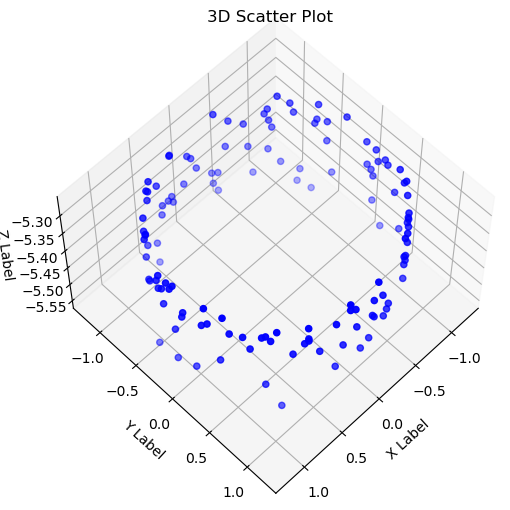

In [61]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D data points
ax.scatter(x, y, z, c='b', marker='o', label='Data Points')

# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(elev=60., azim=45)

# Set a title
plt.title('3D Scatter Plot')

# Show the plot
plt.show()

(2, 2)


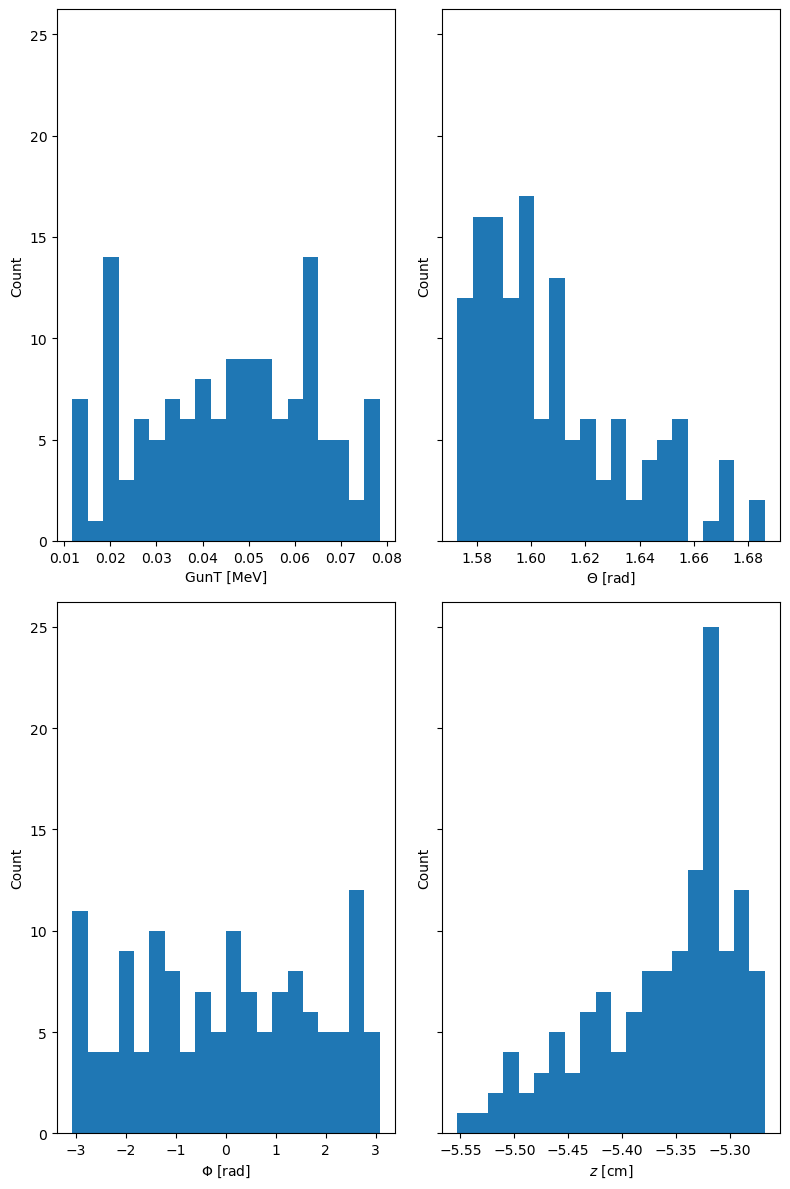

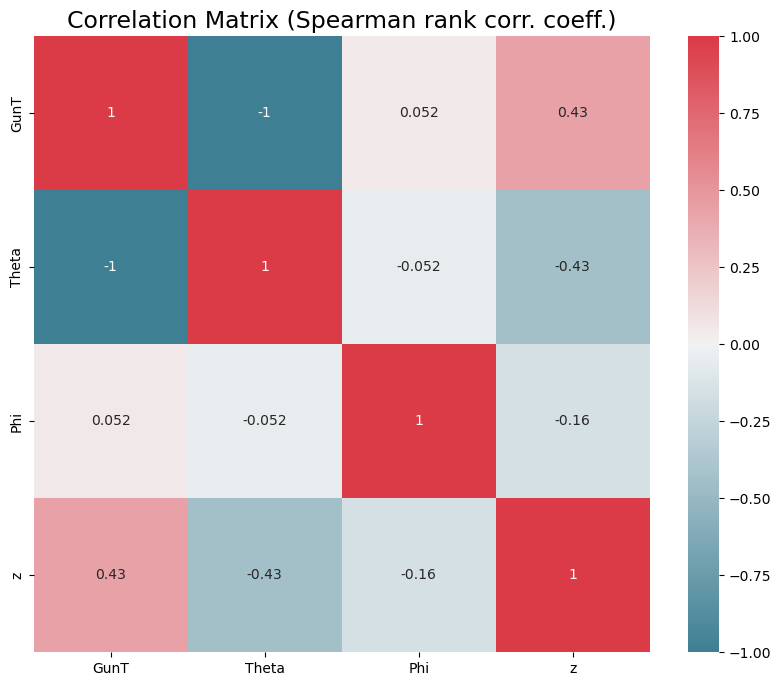

In [72]:
# Distributions and correlation matrix (Spearman)
df=pd.DataFrame(gun,columns=['GunT','Theta','Phi','x','y','z'])

fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(8, 12))
print(axs.shape)
axs[0,0].hist(gunT,bins=20)
axs[0,0].set_xlabel(r'GunT [MeV]')
axs[0,0].set_ylabel(r'Count')
axs[0,1].hist(theta,bins=20)
axs[0,1].set_xlabel(r'$\Theta$ [rad]')
axs[0,1].set_ylabel(r'Count')
axs[1,0].hist(phi,bins=20)
axs[1,0].set_xlabel(r'$\Phi$ [rad]')
axs[1,0].set_ylabel(r'Count')
axs[1,1].hist(z,bins=20)
axs[1,1].set_xlabel(r'$z$ [cm]')
axs[1,1].set_ylabel(r'Count')

fig.savefig("Distributions.png", dpi=500)

corr = df[['GunT','Theta','Phi','z']].corr(method='spearman')
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_),
                cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True,
                square=True, ax=ax)
ax.title.set_text('Correlation Matrix (Spearman rank corr. coeff.)')
ax.title.set_size(17)
f.savefig("CorrelationMatrix.png", dpi=500)

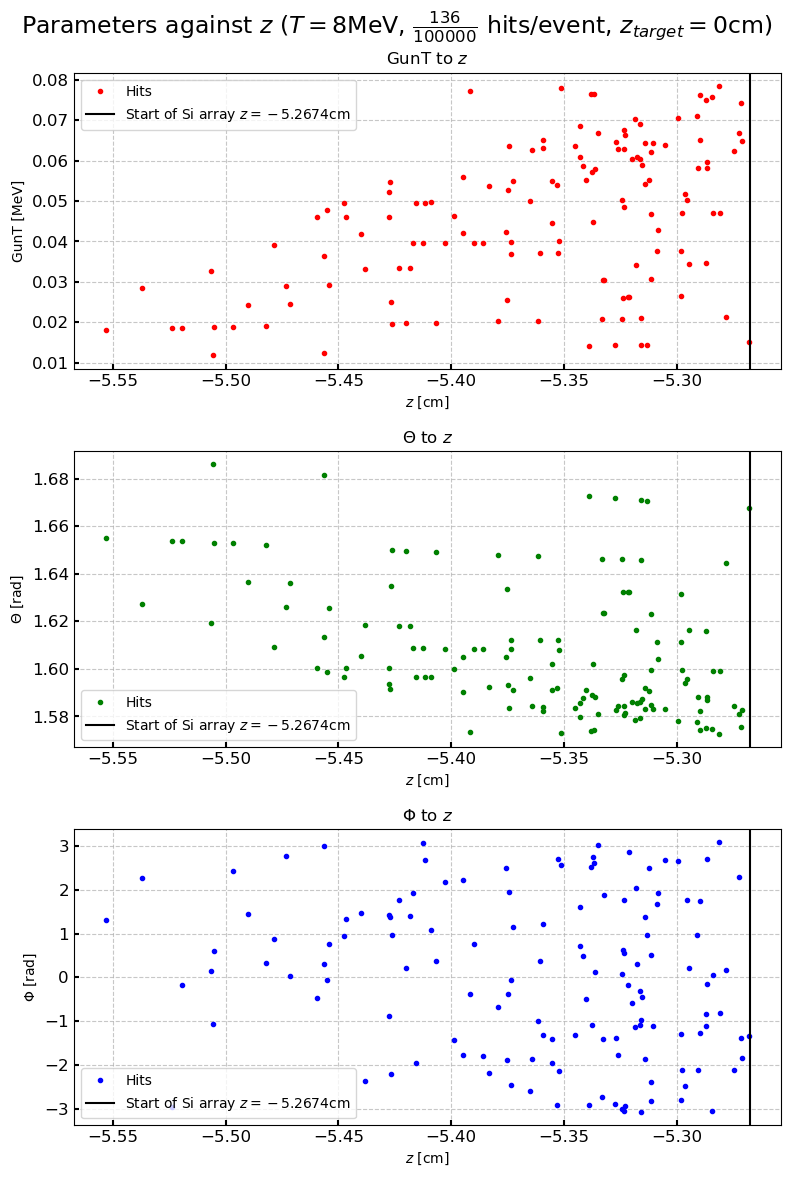

In [74]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle(r'Parameters against $z$ ($T=8$MeV, $\frac{136}{100000}$ hits/event, $z_{target}=0$cm)', fontsize=17)


# Plot gunT against z
ax1.plot(z, gunT, '.', color='r', label='Hits')
ax1.set_xlabel(r'$z$ [cm]')
ax1.set_ylabel(r'GunT [MeV]')
ax1.set_title(r'GunT to $z$')
#ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot theta against z
ax2.plot(z, theta, '.', color='g', label='Hits')
ax2.set_xlabel(r'$z$ [cm]')
ax2.set_ylabel(r'$\Theta$ [rad]')
ax2.set_title(r'$\Theta$ to $z$',)
ax2.grid(True, linestyle='--', alpha=0.7)

# Plot phi against z
ax3.plot(z, phi, '.', color='b', label='Hits')
ax3.set_xlabel(r'$z$ [cm]')
ax3.set_ylabel(r'$\Phi$ [rad]')
ax3.set_title(r'$\Phi$ to $z$')
ax3.grid(True, linestyle='--', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Customize tick labels
for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='both', which='both', direction='in', labelsize=12)
    ax.xaxis.set_tick_params(width=1.5)
    ax.yaxis.set_tick_params(width=1.5)
    ax.axvline(-5.2674,color='k', label='Start of Si array $z=-5.2674$cm',)
    ax.legend()

# Save and show the plot
fig.savefig("Parameters_to_z.png", dpi=500)
plt.show()
